In [5]:
from scipy.spatial.distance import euclidean
import numpy as np

c1 = [1.0, 1.5]
c2 = [-1.0, -0.5]
c3 = [1.0,-0.5]

dist = euclidean(c1, c3)
print("Расстояние между кластерами c1 и c3: %.4f" % dist)

Расстояние между кластерами c1 и  c3: 2.0000


In [8]:
import pickle


# данные получены с помощью функции make_classification 
with open('clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

In [28]:
clust = np.array([
 [-0.5972191612445694, -0.5919098916910581],
 [-1.5838020751869848, 0.4743393635868491],
 [-1.892642118066139, -1.2770390481464395],
 [-1.021761443519372, -0.38446059106320013],
 [-0.628271339507516, -2.308149346281125],
 [-0.7180915776856387, 1.1805550909358404],
 [-1.543143767548152, -1.4163791359687334],
 [0.022103701018375554, -1.1279478858865397],
 [-0.7776518874305778, -0.4157532453316538],
 [-1.2073577296008344, -1.1308523658604184]
])

centroid = np.array([-0.9774245525274352, -0.032635425821084516])

ck = []

for i in clust:
    ck.append((i[0] - centroid[0])*(i[0] - centroid[0])+ (i[1] -centroid[1])*(i[1] - centroid[1]))
print(np.array(ck).sum())

16.31211696438564


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline


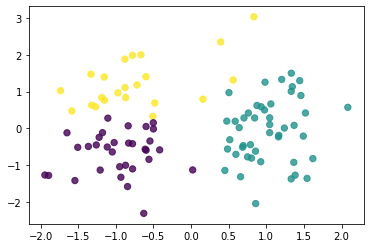

In [145]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(X)

plt.scatter(X[:, 0], X[:, 1],  s=40, c=kmeans_model.labels_, marker='o', alpha=0.8, label='data')
plt.show()

In [151]:
kmeans_model1 = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2)
kmeans_model1.fit(X)

massiv = [[-1.02953453, -0.33212482],
       [ 0.71585996,  0.28931438]],[[ 0.97792098,  0.10168404],
       [-0.97742455, -0.03263543]],[[ 0.98704862,  0.01656288],
       [-0.94785413,  0.05178137]],[[-0.97742455, -0.03263543],
       [ 0.97792098,  0.10168404]],[[ 0.99020356, -0.04629524],
       [-0.91355671,  0.10912697]],[[ 0.97792098,  0.10168404],
       [-0.97742455, -0.03263543]],[[ 0.97792098,  0.10168404],
       [-0.97742455, -0.03263543]],[[ 0.9456866 ,  0.13889342],
       [-0.98377949, -0.07410477]],[[-0.84353263,  0.94445154],
       [ 0.32838521, -0.31933628]],[[-0.97742455, -0.03263543],
       [ 0.97792098,  0.10168404]],[[ 0.44153126,  1.04755818],
       [-0.23736573, -0.51095547]],[[-0.969987  ,  0.03691819],
       [ 0.97048344,  0.03213042]],[[ 0.9456866 ,  0.13889342],
       [-0.98377949, -0.07410477]],[[-0.25884138, -0.41746058],
       [ 0.6047906 ,  1.08915572]],[[-1.0170251 , -0.24497453],
       [ 0.7995344 ,  0.25413053]]

kmeans_model1.cluster_centers_ 


array([[-1.0170251 , -0.24497453],
       [ 0.7995344 ,  0.25413053]])

In [165]:
massiv1 = np.array(massiv)
massiv1


SyntaxError: invalid syntax (<ipython-input-165-43e79f7db43e>, line 2)

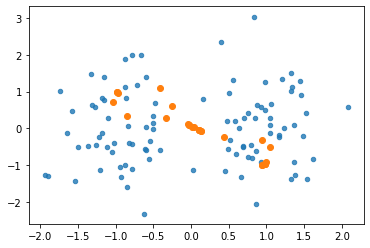

In [153]:
fig, ax = plt.subplots()
plt.scatter(X[:, 0], X[:, 1],  s=20, marker='o', alpha=0.8, label='data')
plt.scatter(massiv1[:,0],massiv1[:,1])
plt.show()

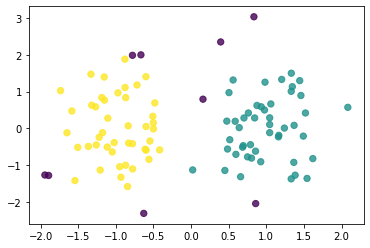

In [163]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.6, min_samples=8).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

labels = db.labels_

plt.scatter(X[:, 0], X[:, 1], s=40, c=labels, marker='o', alpha=0.8, label='data')
plt.show()


In [178]:
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_mutual_info_score

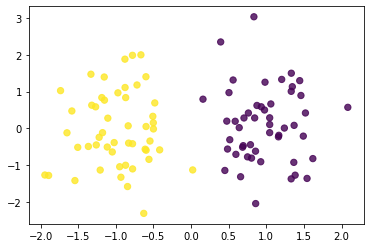

In [167]:
kmeans_model2 = KMeans(n_clusters=2, random_state=42)
model = kmeans_model2.fit(X)
plt.scatter(X[:, 0], X[:, 1],  s=40, c=kmeans_model2.labels_, marker='o', alpha=0.8, label='data')
plt.show()

In [181]:
score = silhouette_score(X, model.labels_)
scoreAMI = adjusted_mutual_info_score(Y, model.labels_, average_method='arithmetic')

print("Качество кластеризации по метрике силуэтта %.3f" % score)
print("Качество кластеризации по метрике AMI %.3f" % scoreAMI)

Качество кластеризации по метрике силуэтта 0.447
Качество кластеризации по метрике AMI 0.929


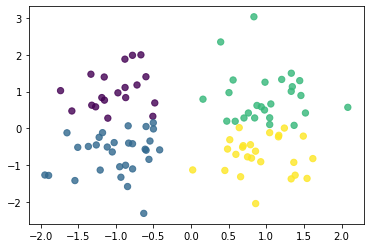

In [175]:
kmeans_model3 = KMeans(n_clusters=4, random_state=42)
model1 = kmeans_model3.fit(X)
plt.scatter(X[:, 0], X[:, 1],  s=40, c=kmeans_model3.labels_, marker='o', alpha=0.8, label='data')
plt.show()

In [182]:
score1 = silhouette_score(X, model1.labels_)
scoreAMI1 = adjusted_mutual_info_score(Y, model1.labels_, average_method='arithmetic')

print("Качество кластеризации по метрике силуэтта %.3f" % score1)
print("Качество кластеризации по метрике AMI %.3f" % scoreAMI1)

Качество кластеризации по метрике силуэтта 0.442
Качество кластеризации по метрике AMI 0.583


In [184]:
import pandas as pd

In [191]:
dtf = pd.read_csv('7.10_clustering_hw.csv')
dtf.head()

,x1,x2,y
0,6.221343,4.968753,2
1,7.360892,8.857455,2
2,-0.108178,4.730723,1
3,3.127358,1.927986,0
4,-0.817259,6.759974,1


In [199]:
X1 = np.array(dtf[['x1','x2']])
Y1 = np.array(dtf['y'])

kmeans_model4 = KMeans(n_clusters=3, random_state=42)
kmeans_model4.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

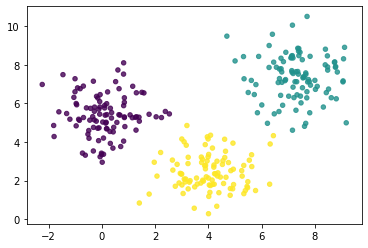

In [200]:
plt.scatter(X1[:, 0], X1[:, 1],  s=20, c=kmeans_model4.labels_, marker='o', alpha=0.8, label='data')

In [204]:
scoreAMI2 = adjusted_mutual_info_score(Y1, kmeans_model4.labels_, average_method='arithmetic')
print("Качество кластеризации по метрике AMI %.3f" % scoreAMI2)

Качество кластеризации по метрике AMI 0.970


In [213]:
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import euclidean_distances

metrics = []
MAX_CLUSTERS = 7
for cluster_num in range(1, MAX_CLUSTERS):
    kmeans_model5 = KMeans(n_clusters=cluster_num, random_state=99).fit(X1)
    centroids, labels = kmeans_model5.cluster_centers_, kmeans_model5.labels_
    metric = 0
    for centroid_label in range(cluster_num):
        metric += euclidean_distances(
            X1[labels==centroid_label],
            centroids[centroid_label,:].reshape(1,-1)
        ).sum(axis=0)[0]
    print("cluster_num %s, metric %s" % (cluster_num, metric))
    metrics.append(metric)

cluster_num 1, metric 1105.897378110108
cluster_num 2, metric 663.5712032768099
cluster_num 3, metric 374.6589714184063
cluster_num 4, metric 348.17052724059585
cluster_num 5, metric 323.0909288942993
cluster_num 6, metric 300.10388486033406


best cluster num: 3


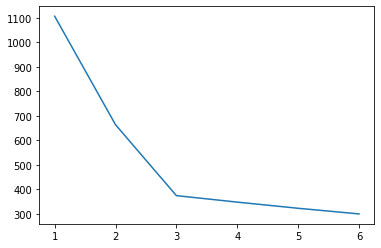

In [202]:
D = []
for i in range(0, len(metrics)-1):
    d = abs(metrics[i+1]-metrics[i])/abs(metrics[i]-metrics[i-1])
    D.append(d)
print("best cluster num: %s" % (np.argmin(D)+1))

plt.plot([i+1 for i in range(len(metrics))], metrics)
plt.show()